In [1]:
import cv2
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

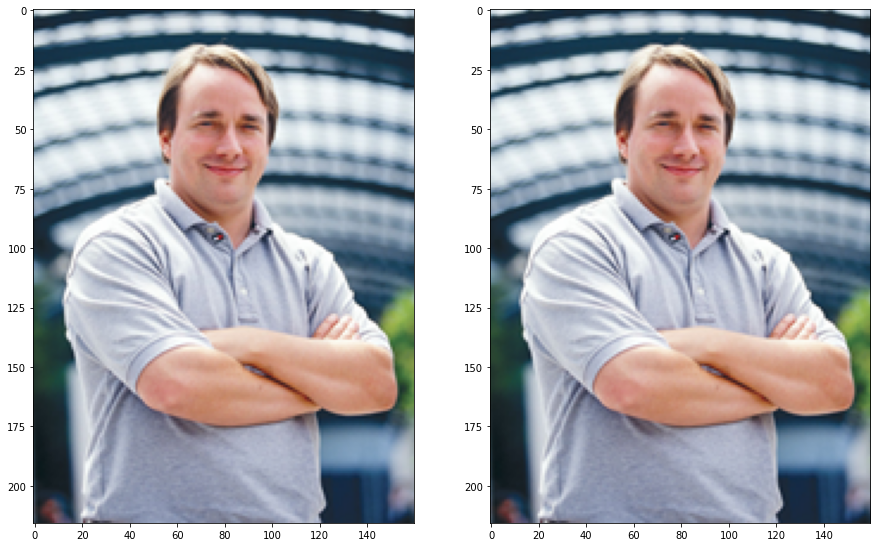

In [2]:
img = cv2.imread("Linus.png", 1)  # 1表示3通道彩色，0表示单通道灰度

#方式一
b, g, r = cv2.split(img)
img_rgb = cv2.merge((r, g, b))

#方式二
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(img_rgb)
axes[1].imshow(img_gray)
plt.show()

In [3]:
#提取指定颜色

In [4]:
import numpy as np

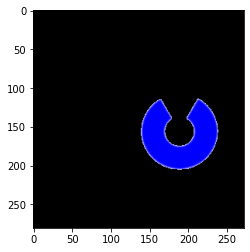

In [5]:
img = cv2.imread('../data/opencv2.png', 1)[..., ::-1]
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# =============指定蓝色值的范围=============
# 蓝色H通道值为120，通常取120上下10的范围
# S通道和V通道通常取50~255间，饱和度太低、色调太暗计算出来的颜色不准确
min_val = np.array([110, 50, 50])
max_val = np.array([130, 255, 255])

# 确定蓝色区域
mask = cv2.inRange(hsv, min_val, max_val) #选取出掩模

# 通过掩码控制的按位与运算，锁定蓝色区域
bule = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(bule)
plt.show()

In [6]:
#plt.imshow(cv2.cvtColor(mask, cv2.COLOR_HSV2RGB))
#plt.show()
print(mask.shape)
print(img.shape)

(281, 272)
(281, 272, 3)


In [7]:
###二值化与反二值化，将想要的内容变成白色，不想要的变成黑色

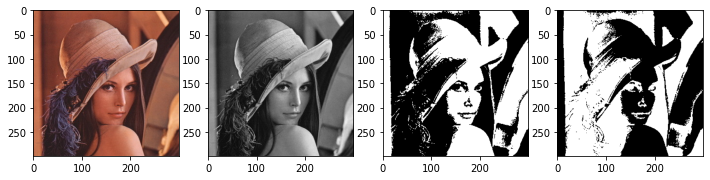

In [8]:
img = cv2.imread('../data/lena.jpg', 1)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

t, res = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
t, res2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

fig, axes = plt.subplots(1, 4, figsize=(12, 12))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))
axes[2].imshow(res, cmap=plt.get_cmap('gray'))
axes[3].imshow(res2, cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
#提取纸张练习

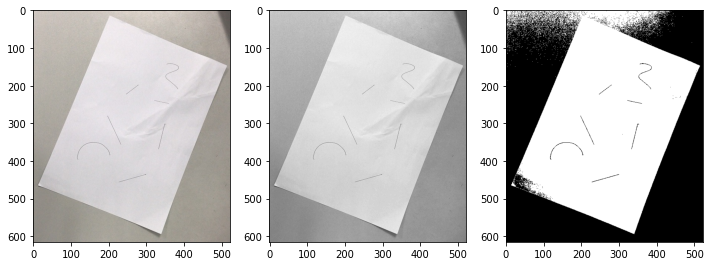

In [10]:
img = cv2.imread('../data/paper.jpg', 1)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
t, res = cv2.threshold(gray, 195, 255, cv2.THRESH_BINARY)

fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))
axes[2].imshow(res, cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
#图像形态操作,镜像操作

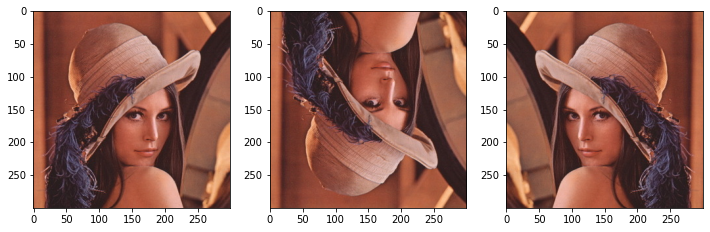

In [12]:
img = cv2.imread('../data/lena.jpg', 1)

flip0 = cv2.flip(img, 0)
flip1 = cv2.flip(img, 1)

fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(flip0, cv2.COLOR_BGR2RGB))
axes[2].imshow(cv2.cvtColor(flip1, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
#仿射变换

In [14]:
def translate(img, x, y):
    """
    坐标平移变换
    :param img: 原始图像数据
    :param x:平移的x坐标
    :param y:平移的y坐标
    :return:返回平移后的图像
    """
    h, w = img.shape[:2]
    #定义平移矩阵
    M = np.float32([[1, 0, x],
                    [0, 1, y]])
    res = cv2.warpAffine(img, M, (w, h))

    return res

In [15]:
def rotate(img, angle, center=None, scale=1.0):
    """
    图像旋转变换
    :param img: 原始图像数据
    :param angle: 旋转角度
    :param center: 旋转中心，如果为None则以原图中心为旋转中心
    :param scale: 缩放比例，默认为1
    :return: 返回旋转后的图像
    """
    h, w = img.shape[:2]
    if center == None:
        center = (w / 2, h / 2)

    #定义平移矩阵
    M = cv2.getRotationMatrix2D(center, angle, scale)  #默认逆时针旋转
    res = cv2.warpAffine(img, M, (w, h))

    return res

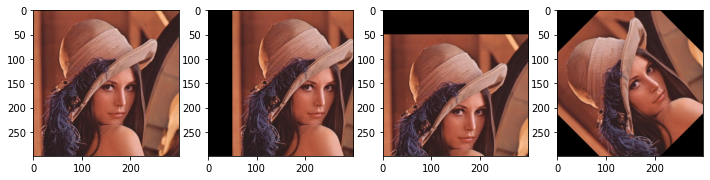

In [16]:
img = cv2.imread('../data/lena.jpg', 1)[..., ::-1]

x_50 = translate(img, 50, 0)
y_50 = translate(img, 0, 50)

r_45 = rotate(img, 45)

fig, axes = plt.subplots(1, 4, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(x_50)
axes[2].imshow(y_50)
axes[3].imshow(r_45)
plt.show()

In [17]:
np.array(range(1, 10))[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [18]:
#图像缩放

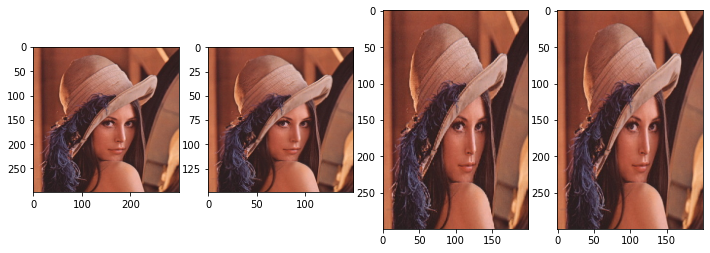

In [19]:
img = cv2.imread('../data/lena.jpg', 1)[..., ::-1]

h, w = img.shape[:2]

dst_size = (int(w / 2), int(h / 2))  # 缩放目标尺寸，宽高均为原来1/2 ,除完了是浮点数，所以要int
resized_min = cv2.resize(img, dst_size)  # 执行缩放

dst_size = (200, 300)  # 缩放目标尺寸，宽200，高300
method = cv2.INTER_NEAREST  # 最邻近插值
resized_INTER_NEAREST = cv2.resize(img, dst_size, interpolation=method)  # 执行缩放

dst_size = (200, 300)  # 缩放目标尺寸，宽200，高300
method = cv2.INTER_LINEAR  # 双线性插值
resized_INTER_LINEAR = cv2.resize(img, dst_size, interpolation=method)  # 执行缩放

fig, axes = plt.subplots(1, 4, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(resized_min)
axes[2].imshow(resized_INTER_NEAREST)
axes[3].imshow(resized_INTER_LINEAR)
plt.show()

In [20]:
#图像的裁剪

In [21]:
def random_crop(img, w, h):
    '''
    :param img: 待裁剪图像
    :param w: 切多宽
    :param h: 切多高
    :return:
    '''
    start_x = np.random.randint(low=0, high=img.shape[1] - w)
    start_y = np.random.randint(low=0, high=img.shape[0] - h)

    return img[start_y:start_y + h, start_x:start_x + w, :]  #不写最后的通道数也行

In [22]:
def center_crop(img, w, h):
    h_r, w_r = img.shape[:2]

    start_x = int(w_r / 2 - w / 2)
    start_y = int(h_r / 2 - h / 2)

    return img[start_y:start_y + h, start_x:start_x + w, :]  #不写最后的通道数也行

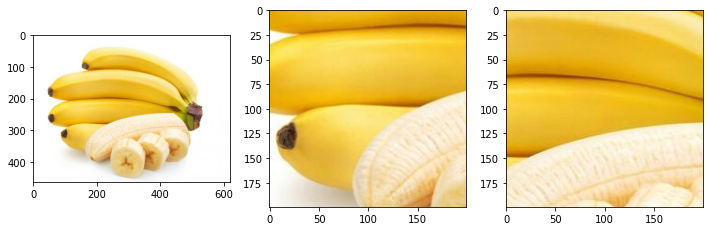

In [23]:
img = cv2.imread('../data/banana_1.png', 1)[..., ::-1]

res1 = random_crop(img, 200, 200)
res2 = center_crop(img, 200, 200)

fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(res1)
axes[2].imshow(res2)
plt.show()

In [24]:
#图像相加

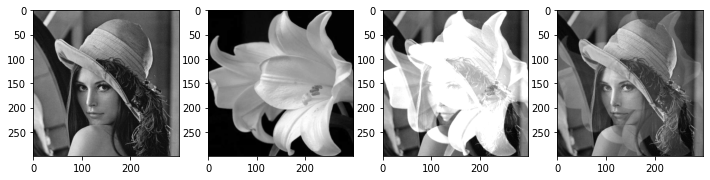

In [25]:
lena = cv2.imread('../data/lena.jpg', 0)[..., ::-1]
lily = cv2.imread('../data/lily_square.png', 0)[..., ::-1]
dst1 = cv2.add(lena, lily)  # 图像直接相加，会导致图像过亮、过白
# 加权求和：addWeighted
# 图像进行加权和计算时，要求src1和src2必须大小、类型相同
dst2 = cv2.addWeighted(lena, 0.8, lily, 0.2, 0)  # 最后一个参数为亮度调节量
fig, axes = plt.subplots(1, 4, figsize=(12, 12))
axes[0].imshow(lena, cmap=plt.get_cmap('gray'))
axes[1].imshow(lily, cmap=plt.get_cmap('gray'))
axes[2].imshow(dst1, cmap=plt.get_cmap('gray'))
axes[3].imshow(dst2, cmap=plt.get_cmap('gray'))
plt.show()

In [26]:
#图像减

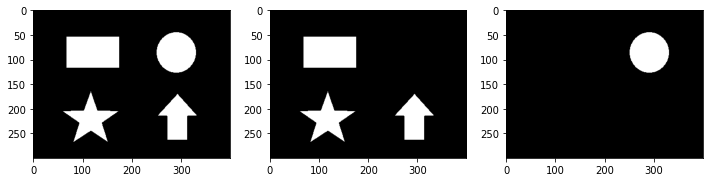

In [27]:
a = cv2.imread("../data/3.png", 0)  #[..., ::-1]
b = cv2.imread("../data/4.png", 0)  #[..., ::-1]

dst = cv2.subtract(a, b)  # 两幅图像相减，是求出图像的差异

fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(a, cmap=plt.get_cmap('gray'))
axes[1].imshow(b, cmap=plt.get_cmap('gray'))
axes[2].imshow(dst, cmap=plt.get_cmap('gray'))
plt.show()

In [28]:
#透视变换

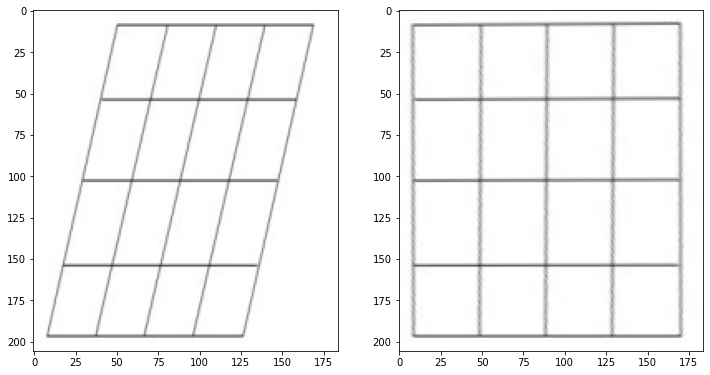

In [29]:
img = cv2.imread('../data/pers.png', 1)[..., ::-1]
h, w = img.shape[:2]

src = np.float32([[58, 2], [167, 9], [8, 196], [126, 196]])  # 输入图像四个顶点坐标
dst = np.float32([[16, 2], [167, 8], [8, 196], [169, 196]])  # 输出图像四个顶点坐标
M = cv2.getPerspectiveTransform(src, dst)

res = cv2.warpPerspective(img, M, (w, h))

fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(res)
plt.show()

In [30]:
#图像腐蚀

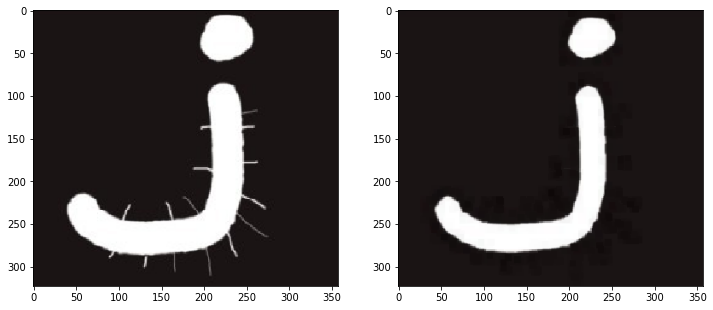

In [31]:
img = cv2.imread("../data/5.png", 1)[..., ::-1]

# 腐蚀
kernel = np.ones((3, 3), np.uint8)  # 用于腐蚀计算的核
erosion = cv2.erode(img,  # 原始图像
                    kernel,  # 腐蚀核
                    iterations=3)  # 迭代次数
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(erosion)
plt.show()

In [32]:
#图像膨胀

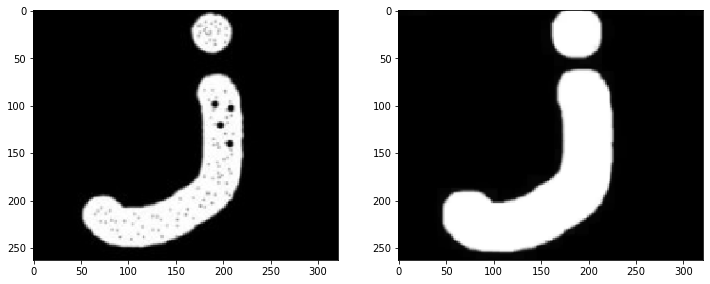

In [33]:
img = cv2.imread("../data/9.png", 1)[..., ::-1]

# 腐蚀
kernel = np.ones((3, 3), np.uint8)  # 用于膨胀计算的核
erosion = cv2.dilate(img,  # 原始图像
                     kernel,  # 腐蚀核
                     iterations=5)  # 迭代次数
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(erosion)
plt.show()

In [34]:
#开运算,先腐蚀再膨胀

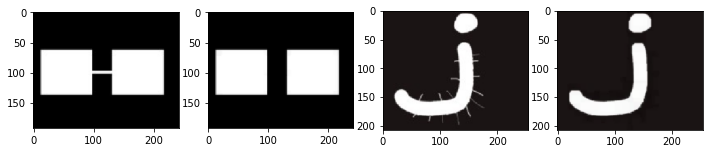

In [35]:
# 读取原始图像
im1 = cv2.imread("../data/7.png", 1)[..., ::-1]
im2 = cv2.imread("../data/8.png", 1)[..., ::-1]

# 执行开运算
k = np.ones((5, 5), np.uint8)
r1 = cv2.morphologyEx(im1, cv2.MORPH_OPEN, k, iterations=3)
r2 = cv2.morphologyEx(im2, cv2.MORPH_OPEN, k, iterations=3)
fig, axes = plt.subplots(1, 4, figsize=(12, 12))

axes[0].imshow(im1)
axes[1].imshow(r1)
axes[2].imshow(im2)
axes[3].imshow(r2)
plt.show()

In [36]:
#闭运算

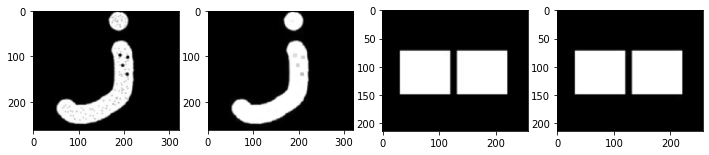

In [37]:
# 读取原始图像
im1 = cv2.imread("../data/9.png", 1)[..., ::-1]
im2 = cv2.imread("../data/10.png", 1)[..., ::-1]

# 执行开运算
k = np.ones((3, 3), np.uint8)
r1 = cv2.morphologyEx(im1, cv2.MORPH_CLOSE, k, iterations=3)
r2 = cv2.morphologyEx(im2, cv2.MORPH_CLOSE, k, iterations=3)
fig, axes = plt.subplots(1, 4, figsize=(12, 12))

axes[0].imshow(im1)
axes[1].imshow(r1)
axes[2].imshow(im2)
axes[3].imshow(r2)
plt.show()

In [38]:
#形态学梯度

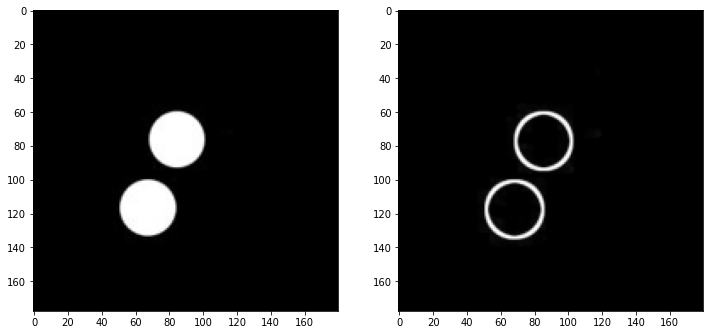

In [39]:
o = cv2.imread("../data/6.png")

k = np.ones((2, 2), np.uint8)
r = cv2.morphologyEx(o, cv2.MORPH_GRADIENT, k, iterations=2)
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(o)
axes[1].imshow(r)
plt.show()

In [40]:
#图像模糊

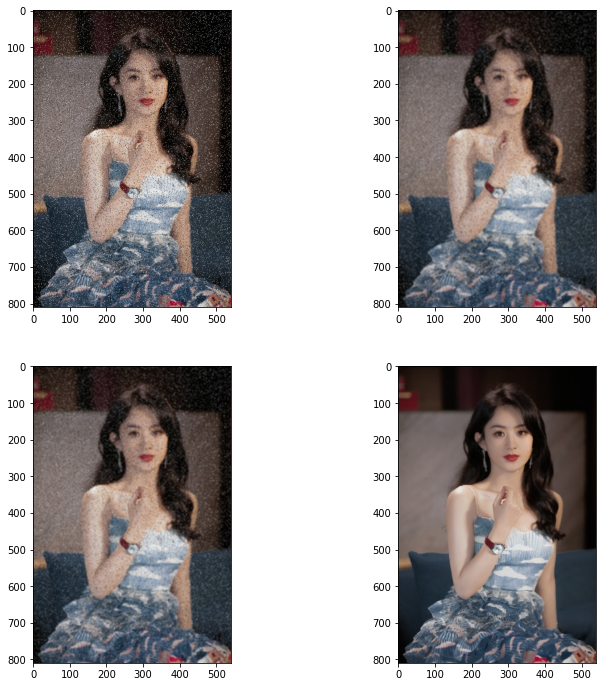

In [41]:
img = cv2.imread("../data/salt.jpg", 1)[..., ::-1]
#均值滤波
res1 = cv2.blur(img, (5, 5))
res2 = cv2.GaussianBlur(img, (5, 5), 3)
res3 = cv2.medianBlur(img, 3)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0][0].imshow(img)
axes[0][1].imshow(res1)
axes[1][0].imshow(res2)
axes[1][1].imshow(res3)
plt.show()

In [42]:
#高斯滤波实现过程

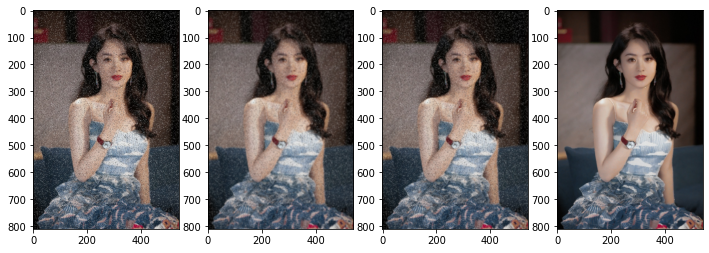

In [43]:
img = cv2.imread("../data/salt.jpg", 1)[..., ::-1]
#均值滤波
res1 = cv2.blur(img, (5, 5))

gaussan_blur = np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]], np.float32) / 273
# 使用filter2D, 第二个参数为目标图像的所需深度, -1表示和原图像相同
res2 = cv2.filter2D(img, -1, gaussan_blur)

res3 = cv2.medianBlur(img, 3)
fig, axes = plt.subplots(1, 4, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(res1)
axes[2].imshow(res2)
axes[3].imshow(res3)
plt.show()

In [44]:
#锐化

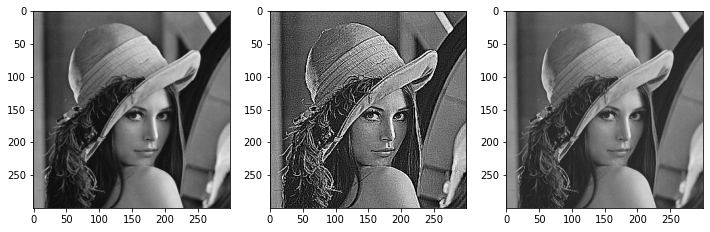

In [45]:
img = cv2.imread("../data/lena.jpg", 0)

#锐化算子1
shappen1 = np.array([[-1, - 1, - 1],
                     [-1, 9, -1],
                     [-1, -1, -1]])

res1 = cv2.filter2D(img,
                    -1,  #与原始通道数量保持一致
                    shappen1)
#锐化算子2
shappen2 = np.array([[0, - 1, 0],
                     [-1, 8, -1],
                     [0, 1, 0]]) / 6.0
res2 = cv2.filter2D(img,
                    -1,  #与原始通道数量保持一致，#图像深度
                    shappen2)

fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(img, cmap=plt.get_cmap('gray'))
axes[1].imshow(res1, cmap=plt.get_cmap('gray'))
axes[2].imshow(res2, cmap=plt.get_cmap('gray'))
plt.show()

In [46]:
#边沿检测

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


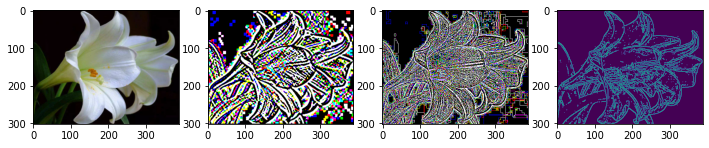

In [47]:
img = cv2.imread("../data/lily.png", 1)[..., ::-1]
# # 水平方向滤波
# hsobel = cv.Sobel(im, cv.CV_64F, 1, 0, ksize=5)
# cv.imshow('H-Sobel', hsobel)
# # 垂直方向滤波
# vsobel = cv.Sobel(im, cv.CV_64F, 0, 1, ksize=5)
# cv.imshow('V-Sobel', vsobel)
# 两个方向滤波
# cv2.CV_64F: 输出图像深度，本来应该设置为-1，但如果设成-1，可能会发生计算错误
# 所以通常先设置为精度更高的CV_64F
sobel = cv2.Sobel(img,
                  cv2.CV_64F,  #图像深度
                  dx=1,
                  dy=1,
                  ksize=11)  #滤波器大小

laplacian = cv2.Laplacian(img,
                          cv2.CV_64F,
                          )

canny = cv2.Canny(img
                  , 50  #滞后域值
                  , 50)  #模糊度

fig, axes = plt.subplots(1, 4, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(sobel)
axes[2].imshow(laplacian)
axes[3].imshow(canny)
plt.show()